<a href="https://colab.research.google.com/github/SaadS315/wrangling/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 2: Wrangling - Saad Shahzad

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [12]:
# 1

data = pd.read_csv("airbnb_hw.csv")

data["Price"].dtype
#It is an object. When numbers are over 999, they have a comma in them.

data["Price_cleaned"] = data["Price"].str.replace(",", "") # takes the comma out of the values.

data["Price_cleaned"] = pd.to_numeric(data["Price_cleaned"])
#Prices are now ints.

missing_values = data["Price_cleaned"].isna().sum()
print(missing_values)

#There are 0 missing values

#2.

data_police = pd.read_csv("mn_police_use_of_force.csv")

data_police["subject_injury"].value_counts(dropna = False)
#There are 9848 NaN values.
#Roughly 76% of the values are missing. This is a concern because it is a significant porportion of the values.

data_police["injury_missing"] = data_police["subject_injury"].isna()

pd.crosstab(data_police["force_type"], data_police["injury_missing"], normalize="index")


#The force_types with higher severity like firearms and lethal projecticles have low missing values. This makes sense because
# those would likely be reported more. Doing this cross-tabulation shows that the proportion of missing values depends on the
 # severity of the force_type.

0


injury_missing,False,True
force_type,,
Baton,0.500000,0.500000
Bodily Force,0.252280,0.747720
Chemical Irritant,0.107972,0.892028
Firearm,1.000000,0.000000
Gun Point Display,0.740385,0.259615
Improvised Weapon,0.500000,0.500000
Less Lethal,0.000000,1.000000
Less Lethal Projectile,1.000000,0.000000
Maximal Restraint Technique,0.000000,1.000000


In [13]:
#3

df = pd.read_csv("PretrialData.csv")
df.head(5)

df["WhetherDefendantWasReleasedPretrial"].value_counts(dropna=False)


df["released_pretrial_clean"] = df["WhetherDefendantWasReleasedPretrial"].replace(9, np.nan) # 9 was being used to show missing values, and this fixes that.

#4

df["ImposedSentenceAllChargeInContactEvent"].head(5)

#df["SentenceTypeAllChargesAtConvictionInContactEvent"].head(5)

#Sentence type is showing numeric codes. Imposed sentence has blank values. The missing values are not random, as they depend on the sentence.

df["Imposed_sentence_cleaned"] = pd.to_numeric(df["ImposedSentenceAllChargeInContactEvent"], errors = "coerce") # Converts to numeric values


/tmp/ipython-input-1135747072.py:3: DtypeWarning: Columns (1,4,5,7,79,80,81,82,83,84,108,163,164,165,166,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,270,271,272,273,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,301,302,303,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [14]:
#1

sharks = pd.read_excel("GSAF5.xls")

# 2

sharks = sharks.dropna(axis = 1, how = "all")

# 3

sharks["Year"].value_counts() # Wide range of values and some counts for years like 5.0, 77.0.

#shark_data["Year"].min(), shark_data["Year"].max() # Min value of 0.0 and max of 3019.9 is not realistic.

sharks["Year_clean"] = pd.to_numeric(sharks["Year"], errors="coerce")

sharks.loc[(sharks["Year_clean"] < 1900) | (sharks["Year_clean"] > 2025), "Year_clean"] = pd.NA

sharks["Year_clean"].min(), sharks["Year_clean"].max() # Range is now more reasonable

sharks["Year_clean"].head(5)

shark_data_since_1940 = sharks[sharks["Year_clean"] >= 1940]

attacks_per_year = shark_data_since_1940.groupby("Year_clean").size()
attacks_per_year.head(100) # Attacks seem to be increasing over time. This is likely due to increased reporting of these events over time.


,0
Year_clean,
1940.0,24
1941.0,27
1942.0,41
1943.0,28
1944.0,31
...,...
2021.0,111
2022.0,98
2023.0,109


(array([ 16., 125., 306., 762., 564., 429., 408., 266., 204., 209., 177.,
        145.,  86., 109.,  43.,  35.,  23.,  10.,   2.,   4.]),
 array([ 1. ,  5.3,  9.6, 13.9, 18.2, 22.5, 26.8, 31.1, 35.4, 39.7, 44. ,
        48.3, 52.6, 56.9, 61.2, 65.5, 69.8, 74.1, 78.4, 82.7, 87. ]),
 <BarContainer object of 20 artists>)

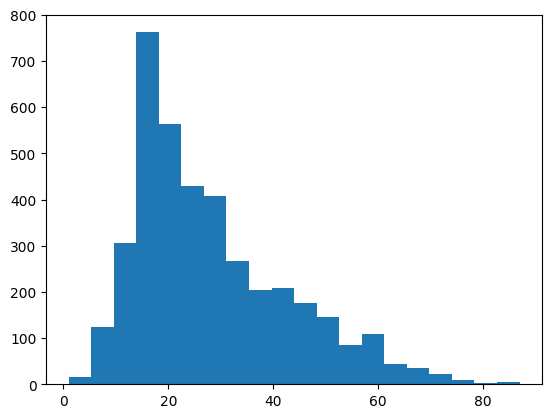

In [15]:
# 4

sharks["Age"].head(120)

sharks["Age_clean"] = pd.to_numeric(sharks["Age"], errors="coerce")

sharks.loc[(sharks["Age_clean"] < 0) | (sharks["Age_clean"] > 120), "Age_clean"] = pd.NA

plt.hist(sharks["Age_clean"].dropna(), bins = 20)

In [16]:
# 5

sharks["Sex"].value_counts() # About 87% of victims are male.

# 6

sharks["Type"].value_counts(dropna=False)


sharks["Type_clean"] = sharks["Type"].astype(str).str.strip().str.capitalize()
sharks.loc[~sharks["Type_clean"].isin(["Provoked", "Unprovoked"]), "Type_clean"] = "Unknown"

sharks["Type_clean"].value_counts() # 74% of attacks are unprovoked.

# 7

valid_values = ["Y", "N"]
sharks.loc[~sharks["Fatal Y/N"].isin(valid_values), "Fatal Y/N"] = "Unknown"


# 8

# Sharks are more likely to launch unprovoked attacks against men, and shark attacks are likely to be more fatal when the
# shark is provoked. It is more likely for an attack to be fatal when it is against a man. Sharks are pretty scary, but I feel like
# most of their attacks are when provoked, so it is safer to just not provoke them.



In [17]:
# 9
species = sharks["Species "].astype(str)

species_split = species.str.split()

white_shark_rows = species_split.apply(lambda x: "white" in x)

prop_white_shark = white_shark_rows.mean()

print(prop_white_shark) # 28%

0.028854314002828854


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

In [ ]:
# Answers are attached as a separate file in the assignment folder.